8. We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

In [5]:
import numpy as np
rng = np.random.default_rng(seed=1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

n = 100

p = 1

Y = X - 2X² + ε

(b) Create a scatterplot of X against Y . Comment on what you find.

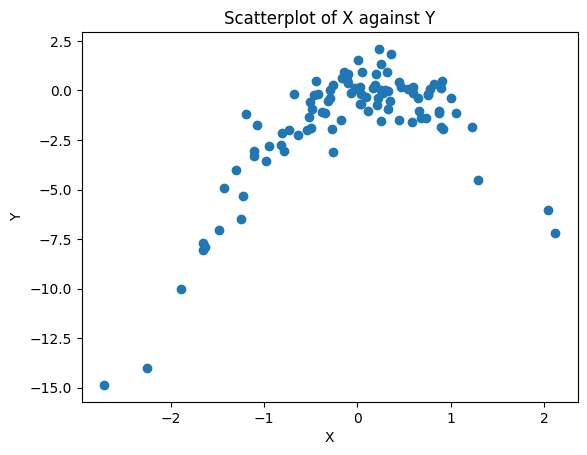

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y")
plt.show()

The data follows a parabolic or inverted "U" shape. This suggests a quadratic relationship between
𝑋
 and
𝑌
, which aligns well with the fact that
𝑌
 was generated using a quadratic function of
𝑋.

(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:

i. $Y = \beta_0 + \beta_1X + \epsilon$

ii. $Y = \beta_0 + \beta_1X + \beta_2X_2 +\epsilon$

iii. $Y = \beta_0 + \beta_1X + \beta_2X_2 + \beta_3X_3 + \epsilon$

iv. $Y = \beta_0 + \beta_1X + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \epsilon$

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': x, 'Y': y})

# Split the data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the function to calculate LOOCV error
def loocv_error(data, degree):
    loo = LeaveOneOut()
    errors = []

    for train_index, test_index in loo.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]
        X_train, y_train = train[['X']], train['Y']
        X_test, y_test = test[['X']], test['Y']

        # Apply polynomial features
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Fit the model and make predictions
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)

        # Calculate the squared error
        errors.append((y_test - y_pred) ** 2)

    # Return the average LOOCV error
    return np.mean(errors)

# Calculate the LOOCV errors for each model
loocv_errors = {}
for degree in range(1, 5):
    loocv_errors[f'Model_{degree}'] = loocv_error(train_data, degree)

# Display the LOOCV errors
loocv_errors


{'Model_1': 4.103095571069062,
 'Model_2': 1.20420144972864,
 'Model_3': 1.33906820264938,
 'Model_4': 1.156666680721897}

(d) Repeat (c) using another random seed, and report your
results.
Are your results the same as what you got in (c)? Why?

In [8]:
# Change the random seed for the train-test split
train_data, val_data = train_test_split(data, test_size=0.2, random_state=123)

# Calculate the LOOCV errors for each model with the new split
loocv_errors_new_seed = {}
for degree in range(1, 5):
    loocv_errors_new_seed[f'Model_{degree}'] = loocv_error(train_data, degree)

# Display the LOOCV errors with the new seed
loocv_errors_new_seed


{'Model_1': 6.565081023748173,
 'Model_2': 1.032447425372657,
 'Model_3': 0.9844776862946365,
 'Model_4': 1.0153060487922445}

Model_3 now yields the smallest LOOCV error (0.9844776862946365). The results are different.The random seed affects the generated data (x and y). Different data leads to different fits for the models and different LOOCV errors.

(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

Model_4 has the smallest  LOOCV error (1.156666680721897).

(f) Comment on the statistical significance of the coefficient estimates
that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

In [9]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

def fit_model_and_display_significance(data, degree):
    # Generate polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(data[['X']])

    # Add a constant term for the intercept
    X_poly = sm.add_constant(X_poly)

    # Fit the model using OLS
    model = sm.OLS(data['Y'], X_poly).fit()

    # Print the summary, which includes coefficients and their p-values
    print(f"Model with degree {degree}")
    print(model.summary())
    print("\n" + "="*80 + "\n")

for degree in range(1, 5):
    fit_model_and_display_significance(data, degree)

Model with degree 1
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.04e-09
Time:                        09:56:57   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.247

Model 1 (Linear): $ Y = \beta_0 + \beta_1 X + \epsilon $
- **Coefficients**:
  - $\beta_0$ (Intercept) = -1.465, significant with $p < 0.05$.
  - $\beta_1$ (Linear term) = 1.949, also significant with $p < 0.05$.
- **Interpretation**: Both the intercept and linear term are significant, meaning they contribute meaningfully to the model. However, the model has an $R^2$ of only 0.318, which indicates that a linear model does not capture much of the variance in $Y$. This aligns with the high LOOCV error observed for Model 1, suggesting that it is too simple to model the true relationship effectively.

Model 2 (Quadratic): $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon $
- **Coefficients**:
  - $\beta_0$ (Intercept) = -0.0728, not significant ($p = 0.543$).
  - $\beta_1$ (Linear term) = 0.9663, significant ($p < 0.05$).
  - $\beta_2$ (Quadratic term) = -2.0047, highly significant ($p < 0.05$).
- **Interpretation**: The linear and quadratic terms are significant, especially the quadratic term, which aligns with the data’s generation process. The intercept is not significant, which isn’t concerning here. The high $R^2$ value (0.887) shows that this model captures most of the variance in $Y$. This result supports the LOOCV findings, which identified Model 2 as an appropriate fit for the data. Model 2 accurately reflects the true quadratic relationship without unnecessary complexity.

Model 3 (Cubic): $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon $
- **Coefficients**:
  - $\beta_0$ (Intercept) = -0.0572, not significant ($p = 0.635$).
  - $\beta_1$ (Linear term) = 1.1146, significant ($p < 0.05$).
  - $\beta_2$ (Quadratic term) = -2.0471, highly significant ($p < 0.05$).
  - $\beta_3$ (Cubic term) = -0.0643, not significant ($p = 0.287$).
- **Interpretation**: The quadratic term remains significant, and the linear term is also significant, while the cubic term ($\beta_3$) is not. This indicates that the cubic term does not add value in modeling the data’s relationship, as expected given the data’s true quadratic nature. The $R^2$ remains almost identical to Model 2, suggesting no meaningful improvement. This finding aligns with the LOOCV results, where Model 3’s LOOCV error was only marginally lower than Model 2’s, suggesting that Model 3 might be slightly overfitting without adding real predictive power.

Model 4 (Quartic): $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon $
- **Coefficients**:
  - $\beta_0$ (Intercept) = 0.1008, not significant ($p = 0.460$).
  - $\beta_1$ (Linear term) = 0.9050, significant ($p < 0.05$).
  - $\beta_2$ (Quadratic term) = -2.5059, highly significant ($p < 0.05$).
  - $\beta_3$ (Cubic term) = 0.0338, not significant ($p = 0.642$).
  - $\beta_4$ (Quartic term) = 0.1042, significant ($p = 0.023$).
- **Interpretation**: The quadratic term is still highly significant, as expected, while the linear term is also significant. The quartic term ($\beta_4$) is statistically significant, but its impact is likely minor because it captures very small fluctuations. The cubic term remains insignificant, which indicates it does not contribute meaningfully. Model 4 has the highest $R^2$ (0.894), slightly better than Model 2, but the added complexity (with significant $\beta_4$ but insignificant $\beta_3$) suggests possible overfitting. This agrees with the LOOCV results, where Model 4 had the lowest error but added unnecessary complexity without a significant gain in interpretability.

Thus, the results from both statistical significance testing and cross-validation support **Model 2** as the best choice, balancing accuracy and model complexity.
